In [1]:
import pandas as pd
import numpy as np
%matplotlib 
%pylab inline


Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [13]:
#畫圖設定
font = {    'size'   : 18}
pylab.rcParams['figure.figsize'] = (20, 8) #Make figure larger.
matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('./data/北區所有＿扣掉大怪獸_英文_20160901_20170831.csv')
df.head()

,Date,Area,bd_name,loop,Type,Usage
0,2017/08,North,Tien_gia_bin,主迴路,Teach,421187.8
1,2017/08,North,SC,主迴路,Teach,322267.0
2,2017/08,North,EECS,主迴路,Teach,305416.0
3,2017/08,North,SB,主迴路,Teach,183416.0
4,2017/08,North,DinningHall2,主迴路,Rented,113984.0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
Date       712 non-null object
Area       712 non-null object
bd_name    712 non-null object
loop       712 non-null object
Type       712 non-null object
Usage      712 non-null float64
dtypes: float64(1), object(5)
memory usage: 33.5+ KB
None


In [9]:
#檢查有沒有缺值
#dinninghall2,ActivityCenter  好像有缺
df.bd_name.value_counts()

DinningHall2                 178
ActivityCenter               114
EECS                          48
Gym                           36
CCAuditorium                  36
SD10                          24
Info(North)                   24
SB                            12
GraduateDorm1                 12
First_dorm                    12
HABuilding2                   12
HA1                           12
SC                            12
EnvProtect_bd                 12
Tien_gia_bin                  12
SD11                          12
Engineer2                     12
Engineer1                     12
Motocycle                     12
Admin_bd                      12
Swim                          12
Chu-HsuanFemale               12
SA                            12
Badminton                     12
GraduateStudentDormitory1     12
WasteWater                    12
Manegement1                   12
StudentDormitory9             12
Name: bd_name, dtype: int64

In [10]:
df[df.Usage ==0] #找哪些

,Date,Area,bd_name,loop,Type,Usage
53,2017/08,North,Admin_bd,主迴路,Admin,0.0
54,2017/08,North,ActivityCenter,空調R,Admin,0.0
55,2017/08,North,Info(North),主迴路,Admin,0.0
56,2017/08,North,Badminton,主迴路,Admin,0.0
57,2017/08,North,WasteWater,主迴路,Admin,0.0
58,2017/08,North,SD10,學生交誼廳,Dorm,0.0
59,2017/08,North,DinningHall2,2F水果部P動力,Rented,0.0
116,2017/07,North,ActivityCenter,空調R,Admin,0.0
117,2017/07,North,Info(North),主迴路,Admin,0.0
118,2017/07,North,Badminton,主迴路,Admin,0.0


Axes(0.125,0.125;0.775x0.775)


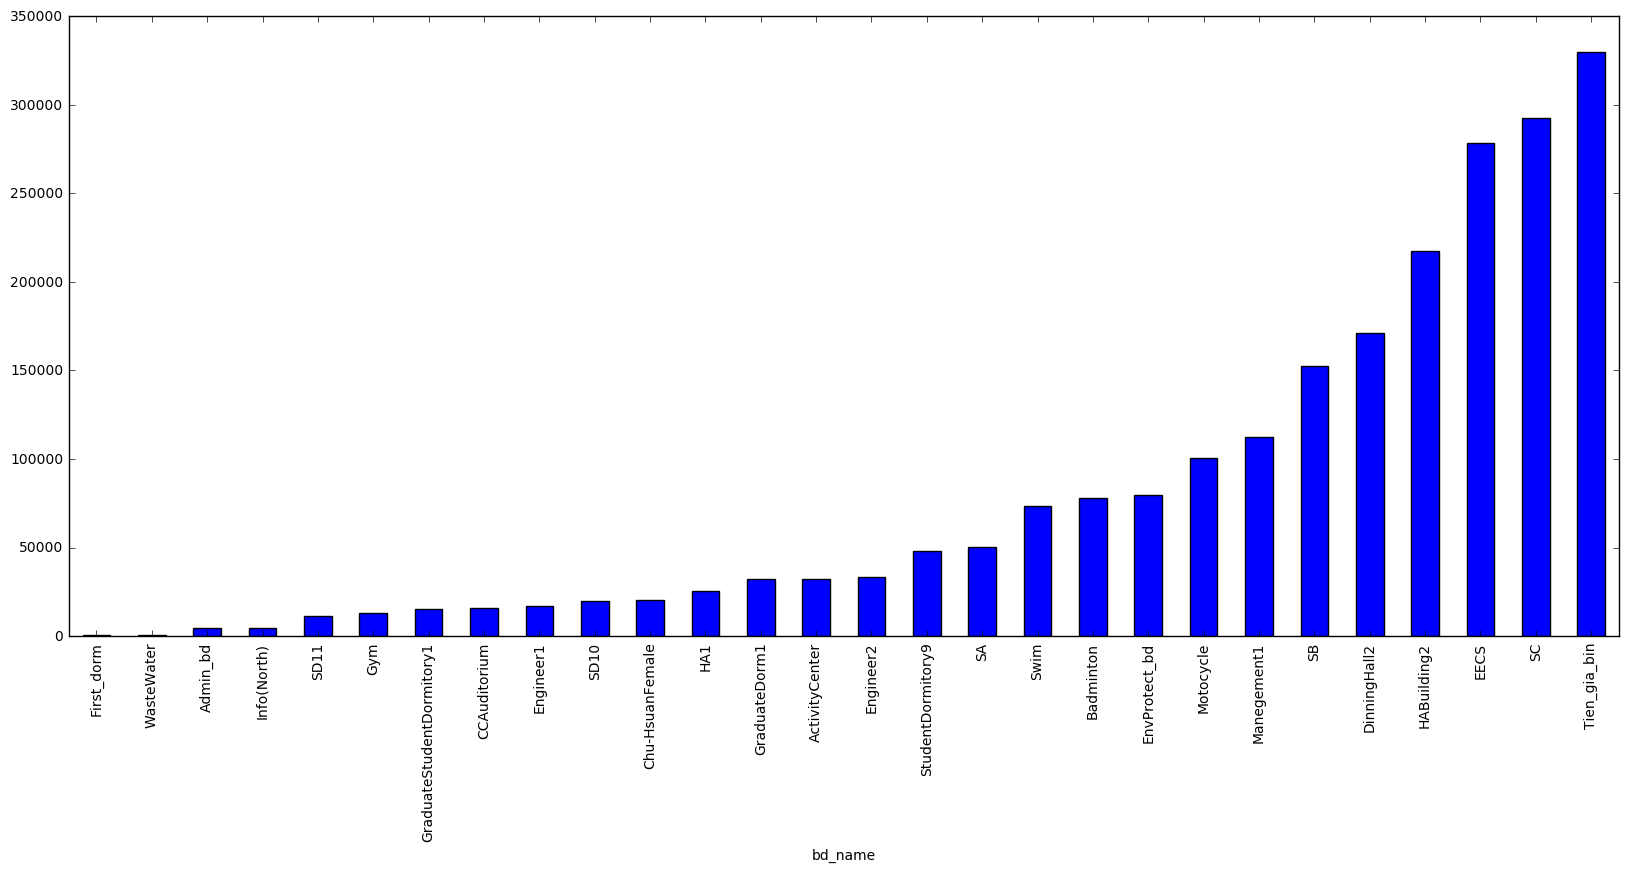

In [11]:
#每個月的用電量
#print(df1.groupby('bd_name').mean().plot.bar()) #沒排序版本
print(df.groupby('bd_name').mean().sort_values('Usage')['Usage'].plot.bar())

SyntaxError: unexpected EOF while parsing (<ipython-input-12-151b05c89c10>, line 1)